In order to extract the stock prices we will use yahoo_fin.
Install it if it is needed

In [1]:
#%pip install yahoo_fin
#%pip install plotly

In [2]:
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si
import datetime as dt
#Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#Delete Warnings in the model function
import warnings
#For my model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Ridge Model
from sklearn.metrics import SCORERS
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
#ElasticNetCV Model
from sklearn.linear_model import ElasticNetCV
#Support Vector Machine
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV

In [3]:
tickers = ['MSFT','TWTR','TSLA','V','CL','^GSPC']

sec_data = {}
#start_date = dt.datetime( 2012, 01, 01)
start_date = dt.date(2012, 1, 1)

for t in tickers:
  sec_data[t] = si.get_data(t, start_date=start_date)

In [4]:
sec_data

{'MSFT':                   open        high         low       close    adjclose  \
 2012-01-03   26.549999   26.959999   26.389999   26.770000   21.749044   
 2012-01-04   26.820000   27.469999   26.780001   27.400000   22.260885   
 2012-01-05   27.379999   27.730000   27.290001   27.680000   22.488358   
 2012-01-06   27.530001   28.190001   27.530001   28.110001   22.837715   
 2012-01-09   28.049999   28.100000   27.719999   27.740000   22.537107   
 ...                ...         ...         ...         ...         ...   
 2021-06-09  253.809998  255.529999  253.210007  253.589996  253.589996   
 2021-06-10  254.289993  257.459991  253.669998  257.239990  257.239990   
 2021-06-11  257.989990  258.489990  256.609985  257.890015  257.890015   
 2021-06-14  257.899994  259.950012  256.799988  259.890015  259.890015   
 2021-06-15  259.774994  259.989990  257.679993  258.359985  258.359985   
 
               volume ticker  
 2012-01-03  64731500   MSFT  
 2012-01-04  80516100   MSFT

In [5]:
close_stocks = {}

for i in sec_data:
    close_stocks[i] = sec_data[i]['close']

df_close = pd.DataFrame(close_stocks)
df_close

MSFT       TWTR        TSLA           V         CL  \
2012-01-03   26.770000        NaN    5.616000   25.747499  45.540001   
2012-01-04   27.400000        NaN    5.542000   25.287500  45.299999   
2012-01-05   27.680000        NaN    5.424000   25.477501  45.070000   
2012-01-06   28.110001        NaN    5.382000   25.177500  44.900002   
2012-01-09   27.740000        NaN    5.450000   24.975000  44.889999   
...                ...        ...         ...         ...        ...   
2021-06-09  253.589996  59.709999  598.780029  232.309998  82.559998   
2021-06-10  257.239990  60.299999  610.119995  233.949997  83.599998   
2021-06-11  257.890015  60.500000  609.890015  234.960007  83.629997   
2021-06-14  259.890015  60.830002  617.690002  234.080002  83.410004   
2021-06-15  258.359985  60.230000  599.359985  232.979996  83.269997   

                  ^GSPC  
2012-01-03  1277.060059  
2012-01-04  1277.300049  
2012-01-05  1281.060059  
2012-01-06  1277.810059  
2012-01-09  1280.699951  
...                 ...  
2021-06-09  4219.549805  
2021-06-10  4239.180176  
2021-06-11  4247.439941  
2021-06-14  4255.149902  
2021-06-15  4246.589844  

[2378 rows x 6 columns]

In [6]:
df_close.describe()

MSFT         TWTR         TSLA            V           CL  \
count  2378.000000  1913.000000  2378.000000  2378.000000  2378.000000   
mean     85.959285    33.766100   100.476087   102.712795    66.943665   
std      61.831271    13.360495   166.968512    58.598185     8.158123   
min      26.370001    14.010000     4.558000    24.777500    44.125000   
25%      40.342500    21.920000    38.398501    53.563125    63.139999   
50%      57.705000    32.980000    48.580000    80.465000    67.700001   
75%     112.074997    41.610001    66.599998   146.875000    72.182503   
max     261.970001    77.629997   883.090027   236.860001    86.260002   

             ^GSPC  
count  2378.000000  
mean   2354.057830  
std     684.212140  
min    1277.060059  
25%    1878.082520  
50%    2165.875000  
75%    2811.632568  
max    4255.149902

In [7]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2378 entries, 2012-01-03 to 2021-06-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2378 non-null   float64
 1   TWTR    1913 non-null   float64
 2   TSLA    2378 non-null   float64
 3   V       2378 non-null   float64
 4   CL      2378 non-null   float64
 5   ^GSPC   2378 non-null   float64
dtypes: float64(6)
memory usage: 130.0 KB


In [8]:
df_close.isnull().sum()

MSFT       0
TWTR     465
TSLA       0
V          0
CL         0
^GSPC      0
dtype: int64

Twitter went to the market in November 07, 2013. For that reason since January 01, 2012 there is not data available for them

In [9]:
df_close['TWTR']['2013-11-07']

44.900001525878906

In [10]:
df_close.dropna(how='any', inplace=True)

In [11]:
df_close

MSFT       TWTR        TSLA           V         CL  \
2013-11-07   37.500000  44.900002   27.954000   49.025002  64.800003   
2013-11-08   37.779999  41.650002   27.590000   49.572498  64.830002   
2013-11-11   37.590000  42.900002   28.940001   49.817501  64.620003   
2013-11-12   37.360001  41.900002   27.559999   49.567501  64.720001   
2013-11-13   38.160000  42.599998   27.740000   49.945000  65.089996   
...                ...        ...         ...         ...        ...   
2021-06-09  253.589996  59.709999  598.780029  232.309998  82.559998   
2021-06-10  257.239990  60.299999  610.119995  233.949997  83.599998   
2021-06-11  257.890015  60.500000  609.890015  234.960007  83.629997   
2021-06-14  259.890015  60.830002  617.690002  234.080002  83.410004   
2021-06-15  258.359985  60.230000  599.359985  232.979996  83.269997   

                  ^GSPC  
2013-11-07  1747.150024  
2013-11-08  1770.609985  
2013-11-11  1771.890015  
2013-11-12  1767.689941  
2013-11-13  1782.000000  
...                 ...  
2021-06-09  4219.549805  
2021-06-10  4239.180176  
2021-06-11  4247.439941  
2021-06-14  4255.149902  
2021-06-15  4246.589844  

[1913 rows x 6 columns]

In [12]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1913 entries, 2013-11-07 to 2021-06-15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    1913 non-null   float64
 1   TWTR    1913 non-null   float64
 2   TSLA    1913 non-null   float64
 3   V       1913 non-null   float64
 4   CL      1913 non-null   float64
 5   ^GSPC   1913 non-null   float64
dtypes: float64(6)
memory usage: 104.6 KB


In [13]:
df_close.std().sort_values()

CL         5.299600
TWTR      13.360495
V         54.410644
MSFT      61.861044
TSLA     179.700196
^GSPC    592.848763
dtype: float64

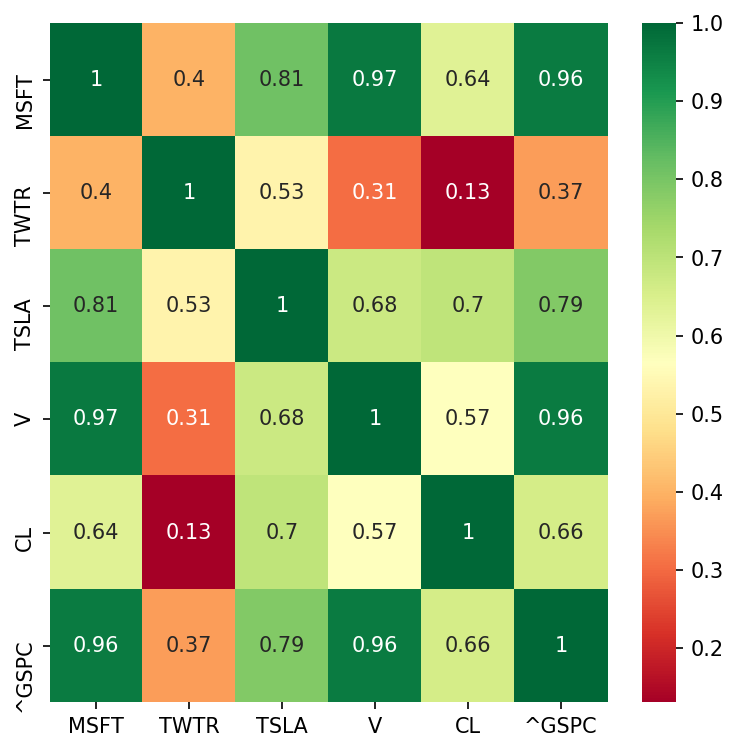

In [14]:
plt.figure(figsize=(6,6), dpi = 150)
sns.heatmap(df_close.corr(), annot=True, cmap="RdYlGn")

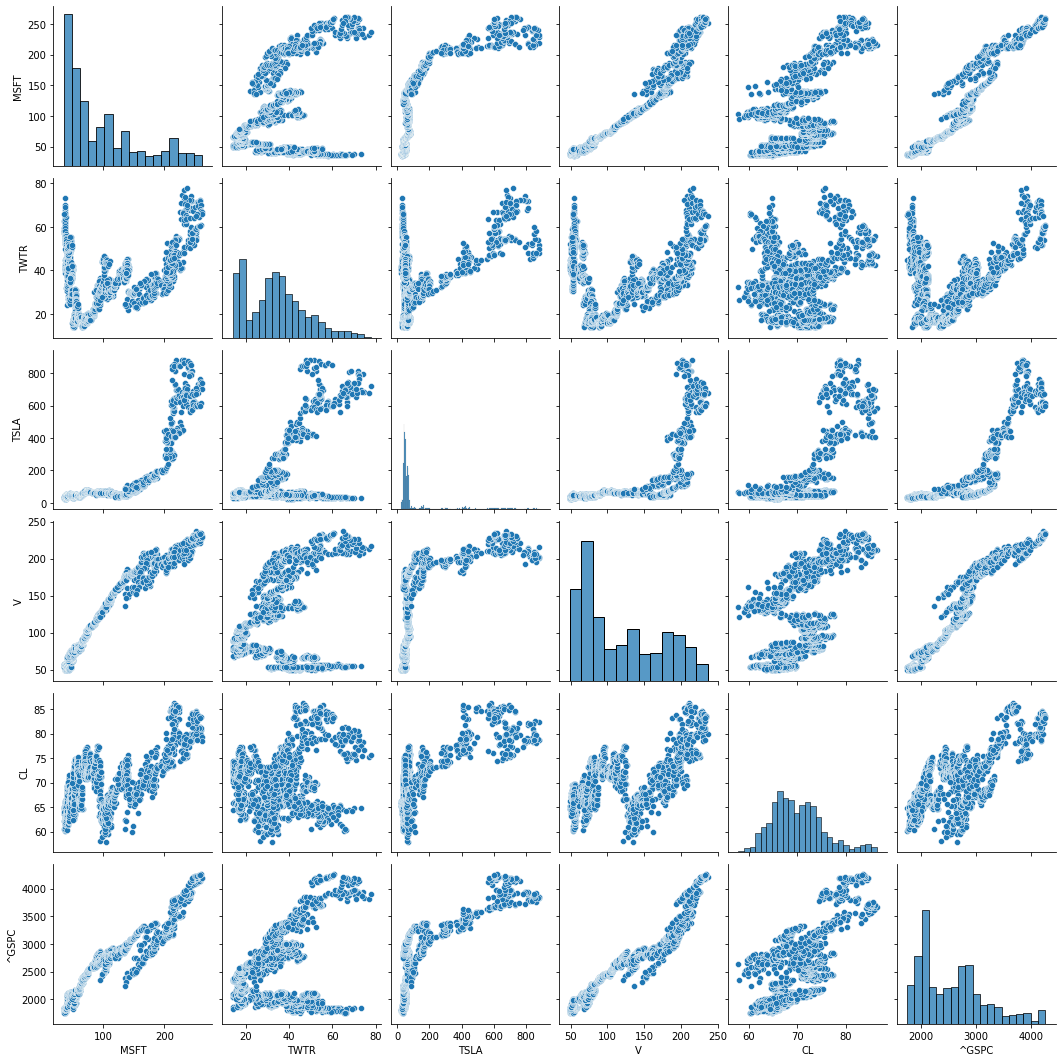

In [36]:
sns.pairplot(df_close)

In [15]:
def normalize(df):
  x = df.copy()
  for i in x.columns:
    x[i] = x[i]/x[i][0]
  return x

In [16]:
df_close_normalized = normalize(df_close)

In [17]:
df_close_normalized.head()

MSFT      TWTR      TSLA         V        CL     ^GSPC
2013-11-07  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2013-11-08  1.007467  0.927617  0.986979  1.011168  1.000463  1.013428
2013-11-11  1.002400  0.955457  1.035272  1.016165  0.997222  1.014160
2013-11-12  0.996267  0.933185  0.985905  1.011066  0.998765  1.011756
2013-11-13  1.017600  0.948775  0.992345  1.018766  1.004475  1.019947

In [18]:
df_close_normalized.describe()

MSFT         TWTR         TSLA            V           CL  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      2.650713     0.752029     4.359639     2.419732     1.080652   
std       1.649628     0.297561     6.428425     1.109855     0.081784   
min       0.932800     0.312027     0.862131     1.000000     0.893210   
25%       1.297067     0.488196     1.590255     1.467415     1.020216   
50%       1.962933     0.734521     1.898905     2.105456     1.069444   
75%       3.630133     0.926726     2.499463     3.460683     1.129630   
max       6.985867     1.728953    31.590828     4.831412     1.331173   

             ^GSPC  
count  1913.000000  
mean      1.467686  
std       0.339323  
min       0.996989  
25%       1.185508  
50%       1.412254  
75%       1.660104  
max       2.435481

In [19]:
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()

In [20]:
interactive_plot(df_close, 'Stock Closed Price')

In [21]:
interactive_plot(df_close_normalized, 'Stock Closed Price Normalized')

### Stocks Daily Return

In [22]:
def daily_return(df):

  df_daily_return = df.copy()
  
  #Loop of columns
  for i in df.columns:
    #Loop of rows
    for j in range(1, len(df[i])):
      df_daily_return[i][j] = ((df[i][j] - df[i][j - 1])/df[i][j-1]) * 100

    df_daily_return[i][0] = 0

  return df_daily_return

In [23]:
df_daily_return = daily_return(df_close)

In [24]:
df_daily_return.head()

MSFT      TWTR      TSLA         V        CL     ^GSPC
2013-11-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2013-11-08  0.746663 -7.238307 -1.302140  1.116771  0.046294  1.342756
2013-11-11 -0.502908  3.001200  4.893079  0.494231 -0.323923  0.072293
2013-11-12 -0.611864 -2.331002 -4.768490 -0.501832  0.154748 -0.237039
2013-11-13  2.141326  1.670637  0.653122  0.761585  0.571686  0.809534

In [25]:
df_daily_return.describe()

MSFT         TWTR         TSLA            V           CL  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.114731     0.074732     0.220084     0.093560     0.020349   
std       1.661803     3.415214     3.467093     1.554320     1.204912   
min     -14.739031   -24.162501   -21.062826   -13.547180    -9.782921   
25%      -0.619579    -1.420820    -1.466079    -0.572238    -0.495621   
50%       0.084265     0.100102     0.087059     0.137587     0.029487   
75%       0.898311     1.528618     1.810357     0.826332     0.586017   
max      14.216888    21.417079    19.894863    13.842635    12.608272   

             ^GSPC  
count  1913.000000  
mean      0.052516  
std       1.099748  
min     -11.984055  
25%      -0.307311  
50%       0.063587  
75%       0.520287  
max       9.382774

In [26]:
interactive_plot(df_daily_return, 'Stock daily return')

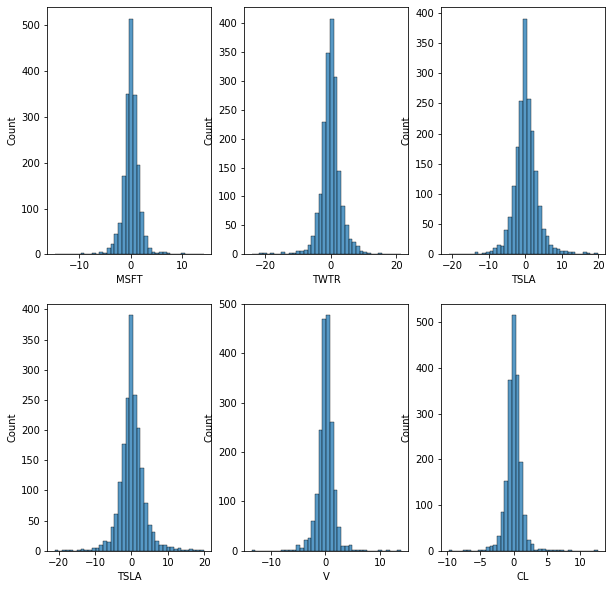

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.histplot(df_daily_return[df_daily_return.columns[i*2+j]], ax=ax[i][j],  bins=40)

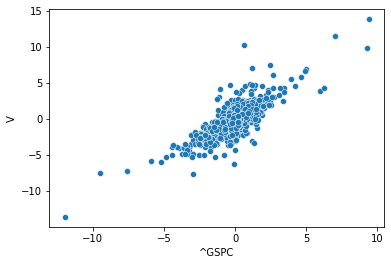

In [40]:
sns.scatterplot(x='^GSPC', y='V', data=df_daily_return)

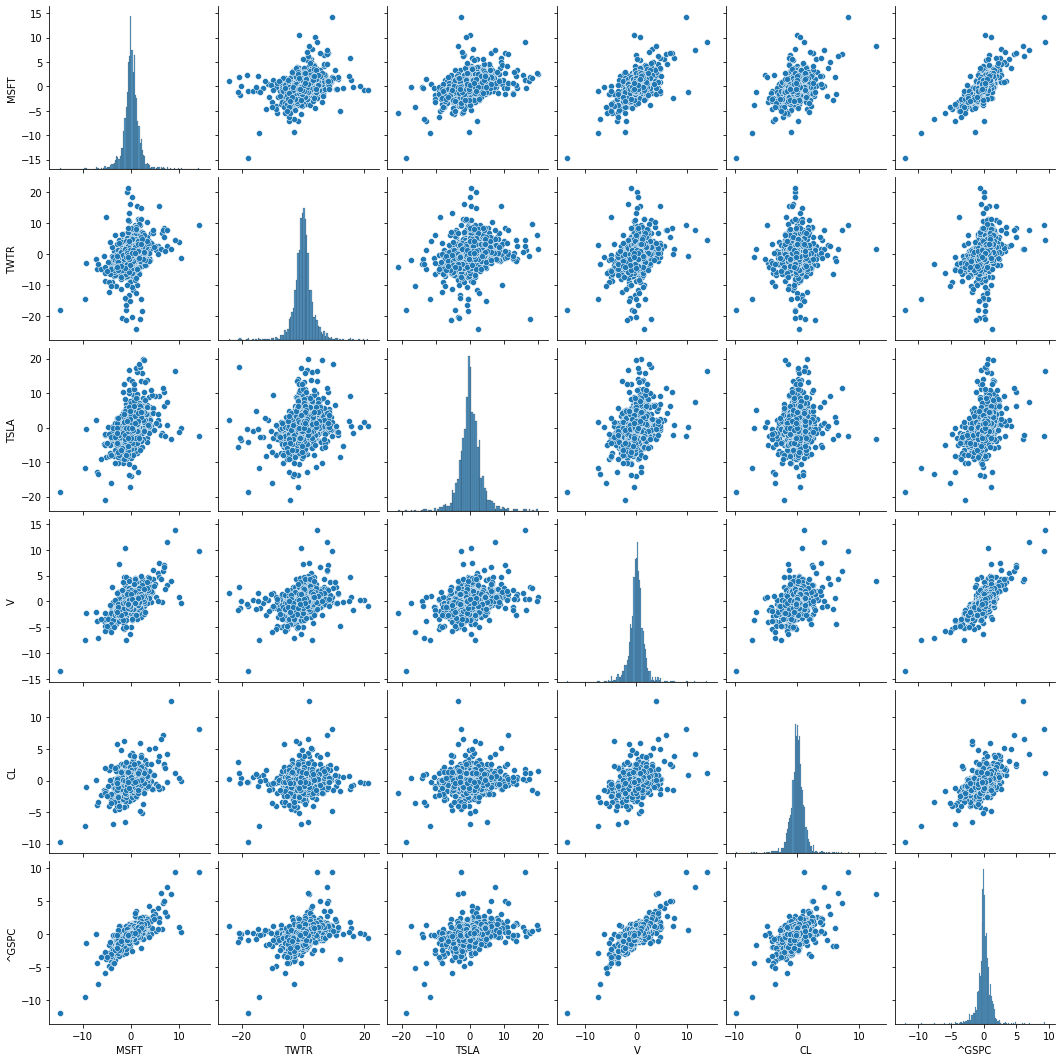

In [41]:
sns.pairplot(df_daily_return)